In [29]:
import os
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

colors = ['#A9D1ED', '#843C0C', '#F8CBAD', '#B0B0B0']

In [57]:
dir = 'C:\\Users\\Mariana\\Documents\\Epilepsy\\data_domains'

hospital = 'HEM'

hsm_dict = {'Patient4': ['PC + ArmBit ForearmBit', '2017-04-23 21:50:21.105000'],
              'Patient2': ['PC + ArmBit ForearmBit', '2017-04-06 17:25:15.775000'],
              'Patient1': ["PC + ArmBit ForearmBit", '2017-02-23 21:50:00.774000'],
              'Patient100': ['PC + ArmBit ForearmBit', '2019-02-12 21:44:32.796000'],
              'Patient112': ['PC + ChestBit WristBit', '2020-03-03 18:57:57.772000'],
              'Patient105': ['PC + ChestBit WristBit', '2019-07-07 10:04:10.321000'],
              'Patient104': ['PC + ChestBit WristBit', '2019-05-07 10:20:10.321000'],
              'Patient101': ['PC + ChestBit WristBit', '2019-02-26 11:10:35.275000'],
              'Patient108': ['PC + ChestBit WristBit', '2019-12-10 10:20:10.321000'],
              'Patient106': ['PC + ChestBit WristBit', '2019-07-30 10:20:10.321000'],
              'Patient111': ['PC + ChestBit WristBit', '2020-02-18 12:02:39.799000'],
              'Patient103': ['PC + ChestBit WristBit', '2019-04-09 10:20:10.321000'],
              'Patient107': ['PC + ChestBit WristBit', '2019-08-27 16:17:18.854000'],
              'Patient109': ['PC + ChestBit WristBit', '2020-01-07 17:58:35.450000'],
              'Patient102': ['PC + ChestBit WristBit', '2019-03-12 10:58:29.403000'],
              'Patient200': ['EpiBOX + ChestBit', '2021-03-01 14:36:05.022688'],
              'Patient205': ['EpiBOX + ChestBit', '2021-09-22 16:21:14.498261'],
              'Patient203': ['EpiBOX + ChestBit', '2021-05-04 15:55:46.148100'],
              'Patient207': ['EpiBOX + ChestBit', '2021-11-09 17:15:50.462852'],
              'Patient209': ['EpiBOX + ChestBit', '2021-12-13 13:39:30.879850'],
              'hsm_19_7_2022': ['EpiBOX + ChestBit', '2022-07-19 09:23:17.661779'],
              'hsm_5_7_2022': ['EpiBOX + ChestBit', '2022-07-04 15:29:19.722616'],
              'hsm_joao': ['EpiBOX + ChestBit', '2022-08-08 15:54:56.728592']}

hem_dict = {'TSSVAS': ['EpiBOX + ChestBit', '2017-04-23 21:50:21.105000'],
              'TASL': ['EpiBOX + ChestBit', '2017-04-06 17:25:15.775000'],
              'SFS': ['EpiBOX + ChestBit', '2017-02-23 21:50:00.774000'],
              'RSG': ['EpiBOX + ChestBit', '2019-02-12 21:44:32.796000'],
              'SVABC': ['EpiBOX + ChestBit', '2020-03-03 18:57:57.772000'],
              'AMRL': ['EpiBOX + ChestBit', '2021-07-19 15:00:37'],
              'NC': ['EpiBOX + ChestBit', '2019-05-07 10:20:10.321000'],
              'MARG': ['EpiBOX + ChestBit', '2019-02-26 11:10:35.275000'],
              'JFPS': ['EpiBOX + ChestBit', '2021-03-01 14:36:05.022688'],
              'FLRB': ['EpiBOX + ChestBit', '2021-09-22 16:21:14.498261'],
              'FCSFDM': ['EpiBOX + ChestBit', '2021-05-04 15:55:46.148100'],
              'DAJRD': ['EpiBOX + ChestBit', '2021-08-03 11:44:34'],
              'DAOS': ['EpiBOX + ChestBit', '2021-12-13 13:39:30.879850'],
              'DAGN': ['EpiBOX + ChestBit', '2021-04-19 13:47:13']
}

In [58]:
dirpath = os.path.join(dir, hospital)
list_patients = os.listdir(dirpath)

def get_time_patient(dirpath, patient_file):
    # get domain file
    table_bit = pd.read_parquet(os.path.join(dirpath, patient_file), engine='fastparquet')
    # pass to datetime
    times = pd.to_datetime(table_bit['Time'])
    # get time jumps
    idx_jumps = np.where(np.diff(times) > np.timedelta64(1000000000))[0]
    # get time right
    time_right = np.sum([np.sum(np.diff(times.iloc[idx_jumps[i]+1:idx_jumps[i+1]])) for i in range(len(idx_jumps)-1)])

    return time_right.astype('timedelta64[s]').astype(float)


In [61]:

# table_times = pd.DataFrame(columns=['patient', 'sensor', 'device', 'timeright'])

for patient_file in list_patients:

    patient = patient_file.split('_domain')[0]
    if patient not in hem_dict.keys():
        continue
    if hem_dict[patient]:
        device = hem_dict[patient][0]
    else:
        device = ''
        print(f'{patient} has no device')

    time_right = get_time_patient(dirpath, patient_file)
    if 'ChestBit' in device:
        for sens in ['ECG', 'Resp', 'Acc']:
            table_times = pd.concat((table_times, pd.DataFrame([[patient, sens, 'ChestBit', time_right]], columns=['patient', 'sensor', 'device', 'timeright'])), ignore_index=True)

    if 'WristBit' in device:
        for sens in ['EDA', 'PPG', 'Acc']:
            table_times = pd.concat((table_times, pd.DataFrame([[patient, sens, 'WristBit', time_right]], columns=['patient', 'sensor', 'device', 'timeright'])), ignore_index=True)

    if 'ArmBit' in device:
        for sens in ['ECG', 'EDA', 'PPG', 'EMG', 'Acc', 'Acc']:
            table_times = pd.concat((table_times, pd.DataFrame([[patient, sens, 'ArmBit', time_right]], columns=['patient', 'sensor', 'device', 'timeright'])), ignore_index=True)


In [62]:
table_times

,patient,sensor,device,timeright
0,hsm_19_7_2022,ECG,ChestBit,191854.0
1,hsm_19_7_2022,Resp,ChestBit,191854.0
2,hsm_19_7_2022,Acc,ChestBit,191854.0
3,hsm_5_7_2022,ECG,ChestBit,94859.0
4,hsm_5_7_2022,Resp,ChestBit,94859.0
...,...,...,...,...
151,TASL,Resp,ChestBit,89012.0
152,TASL,Acc,ChestBit,89012.0
153,TSSVAS,ECG,ChestBit,86972.0
154,TSSVAS,Resp,ChestBit,86972.0


In [47]:
def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(y_list[i-1]+2, i-1.1,y_list[i-1], ha="center")

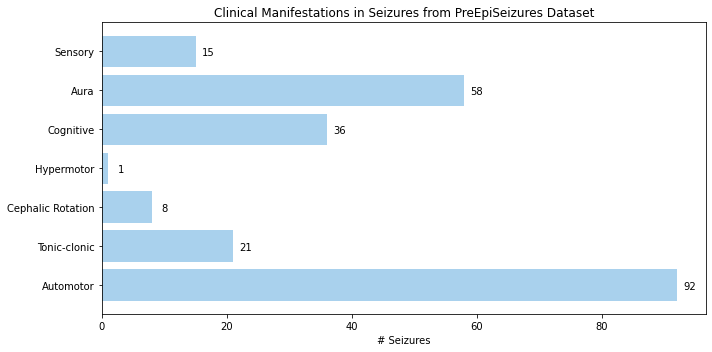

In [48]:

plt.figure(figsize=(10,5))
add_value_label(np.arange(len(list(seizures_dict.keys()))), list(seizures_dict.values()))
plt.title('Clinical Manifestations in Seizures from PreEpiSeizures Dataset')
plt.barh(width = list(seizures_dict.values()), y = list(seizures_dict.keys()), color = colors[0])
plt.xlabel('# Seizures')
plt.tight_layout()
plt.savefig('seizures_manifestations.png')